In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

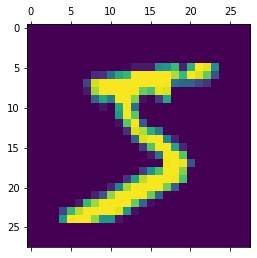

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#scale everything
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
#flatten (60000,28,28) to (60000,784)
x_train_flattened.shape

(60000, 784)

In [11]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4906 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.3070 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.2856 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.2749 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.2682 - accuracy: 0.9258


In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 800us/step - loss: 0.2702 - accuracy: 0.9240


[0.27017495036125183, 0.9240000247955322]

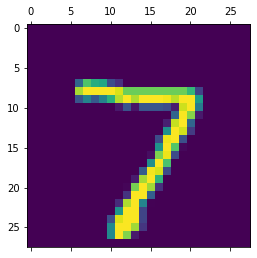

In [14]:
plt.matshow(x_test[0])

In [15]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

array([2.6325528e-05, 7.3373883e-11, 3.6966281e-05, 6.7747533e-03,
       9.7170323e-07, 6.0250481e-05, 1.0007186e-09, 7.6945239e-01,
       5.6371093e-05, 8.4733963e-04], dtype=float32)

In [16]:
np.argmax(y_pred[0])

7

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    0,    3,    2,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    2,    4,    2,   15,    0],
       [  13,    7,  916,   17,   11,    2,   11,   11,   40,    4],
       [   7,    0,   15,  920,    0,   24,    2,   12,   21,    9],
       [   2,    1,    4,    1,  923,    0,    7,    4,    7,   33],
       [  12,    1,    2,   34,   10,  770,   15,    7,   32,    9],
       [  17,    3,    6,    1,    8,   12,  907,    2,    2,    0],
       [   1,    5,   24,    5,    9,    0,    0,  950,    2,   32],
       [  14,    5,    7,   20,    9,   22,    8,   12,  866,   11],
       [  12,    6,    1,   10,   33,    6,    0,   26,    4,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

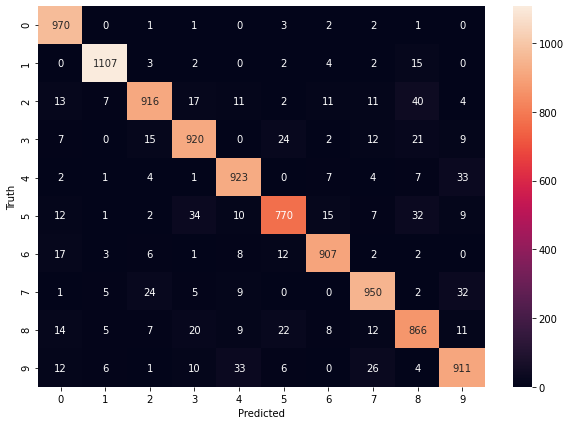

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.9169
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1321 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0951 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0600 - accuracy: 0.9815


In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9763


[0.07939711213111877, 0.9763000011444092]

Text(69.0, 0.5, 'Truth')

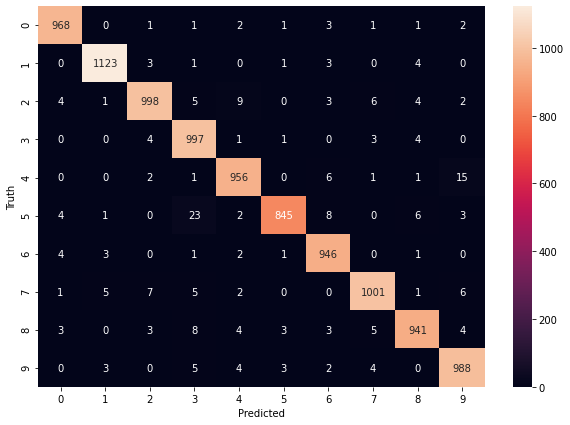

In [22]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.9185
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1364 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0638 - accuracy: 0.9804


In [25]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit